In [83]:
import kaggle

from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()
api.competition_download_file('time-series-classification-part-1','ETTh1_without_missing.csv')

ETTh1_without_missing.csv: Skipping, found more recently modified local copy (use --force to force download)


In [84]:
import csv
def partionnage(chemin):
    row=[]
    with open(chemin, 'r') as file:
        i=0
        reader = csv.reader(file, delimiter=';')
        new_row={}
        for row in reader:
            if(i!=0):
                temp_dic={}
                temp_dic["date"]=(row[0].split(","))[1].split(" ")[0]
                temp_dic["heure"]=int((row[0].split(","))[1].split(" ")[1].split(":")[0])
                temp_dic["OT"]=float((row[0].split(","))[2])
                new_row[int((row[0].split(","))[0])]=temp_dic
            i=i+1
        return new_row
    

data=partionnage('ETTh1_without_missing.csv')
print(data)
liste=[data[i]['date'] for i in range(len(data))]
print(liste)

{0: {'date': '2016-07-01', 'heure': 0, 'OT': 30.5310001373291}, 1: {'date': '2016-07-01', 'heure': 1, 'OT': 27.78700065612793}, 2: {'date': '2016-07-01', 'heure': 2, 'OT': 27.78700065612793}, 3: {'date': '2016-07-01', 'heure': 3, 'OT': 25.04400062561035}, 4: {'date': '2016-07-01', 'heure': 4, 'OT': 21.947999954223643}, 5: {'date': '2016-07-01', 'heure': 5, 'OT': 21.17399978637696}, 6: {'date': '2016-07-01', 'heure': 6, 'OT': 22.79199981689453}, 7: {'date': '2016-07-01', 'heure': 7, 'OT': 23.143999099731445}, 8: {'date': '2016-07-01', 'heure': 8, 'OT': 21.66699981689453}, 9: {'date': '2016-07-01', 'heure': 9, 'OT': 17.445999145507812}, 10: {'date': '2016-07-01', 'heure': 10, 'OT': 19.97900009155273}, 11: {'date': '2016-07-01', 'heure': 11, 'OT': 20.11899948120117}, 12: {'date': '2016-07-01', 'heure': 12, 'OT': 19.20499992370605}, 13: {'date': '2016-07-01', 'heure': 13, 'OT': 18.57200050354004}, 14: {'date': '2016-07-01', 'heure': 14, 'OT': 19.55599975585937}, 15: {'date': '2016-07-01', 

[12.901864274799658, 12.799548459102573, 12.74244737253625, 12.61843077722844, 12.51281994639011, 12.39460665524171, 12.350171728725249, 12.501405793255056, 12.761164810188589, 12.842419667876328, 13.190164832527287, 13.444547135372572, 13.603277028391236, 14.043875369503887, 14.638401640419154, 14.669612195105433, 14.751099867314803, 14.635890431981146, 14.242299590543967, 13.805061012506485, 13.503206688140864, 13.322135928186398, 13.189520116528591, 13.002502096881482]
ok


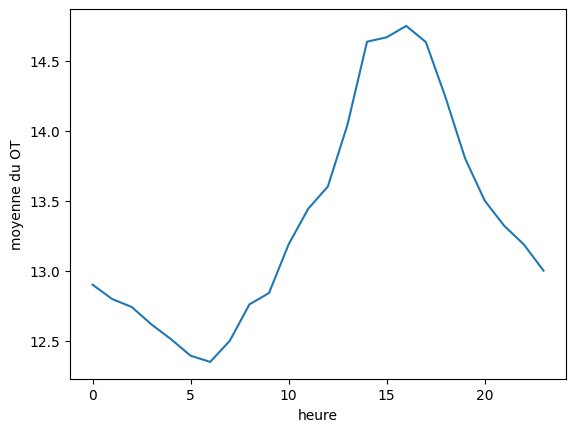

In [85]:
import matplotlib.pyplot as plt

def meanByHour(data):
    numberOfHours=[0 for i in range(0,24)]
    OTmean=[0 for i in range(0,24)]
    i=0
    for i,k in data.items():
        numberOfHours[k["heure"]]=numberOfHours[k["heure"]]+1
        OTmean[k["heure"]]=OTmean[k["heure"]]+k["OT"]    
    return [j / i for j, i in zip(OTmean, numberOfHours)]

print(meanByHour(data))         
print("ok")

meanByHour(data)
def graph(data):
    plt.plot([i for i in range(0,24)],meanByHour(data))
    plt.xlabel('heure')
    plt.ylabel('moyenne du OT')
    plt.show()
    
graph(data)



721.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
17
17
17
1

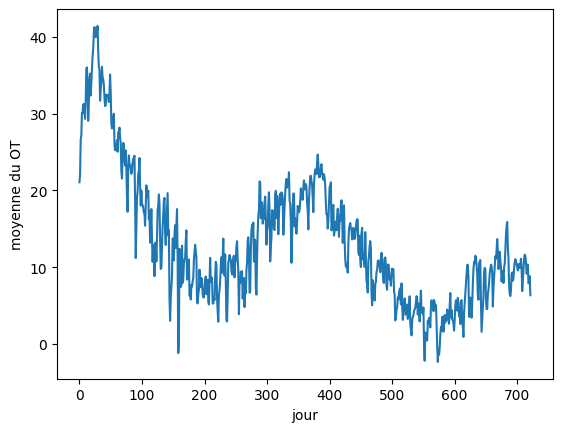

In [86]:
def meanByDay(data):
    print((len(data)-16)/24)
    OTmean=[0 for i in range(int((len(data)-16)/24)+1)]
    numberOfDay=0
    hour=0
    for i,k in data.items():
        print(numberOfDay)
        OTmean[numberOfDay]=OTmean[numberOfDay]+k["OT"]
        hour=hour+1
        if(hour==24):
            hour=0
            OTmean[numberOfDay]=OTmean[numberOfDay]/24
            numberOfDay=numberOfDay+1
    OTmean[len(OTmean)-1]=OTmean[len(OTmean)-1]/16
    return OTmean

print(meanByDay(data))
def graph2(data):
    AllDay=[i for i in range(722)]
    plt.plot(AllDay,meanByDay(data))
    plt.xlabel('jour')
    plt.ylabel('moyenne du OT')
    plt.show()

graph2(data)

[27.288815221478863, 23.018471108008455, 17.804278237364628, 13.114282247680489, 9.837237237802437, 6.500828644481077, 5.213990595992855, 6.653926073102862, 8.872021500602045, 12.422221103342629, 14.058095425367355, 10.609526399289003]
12


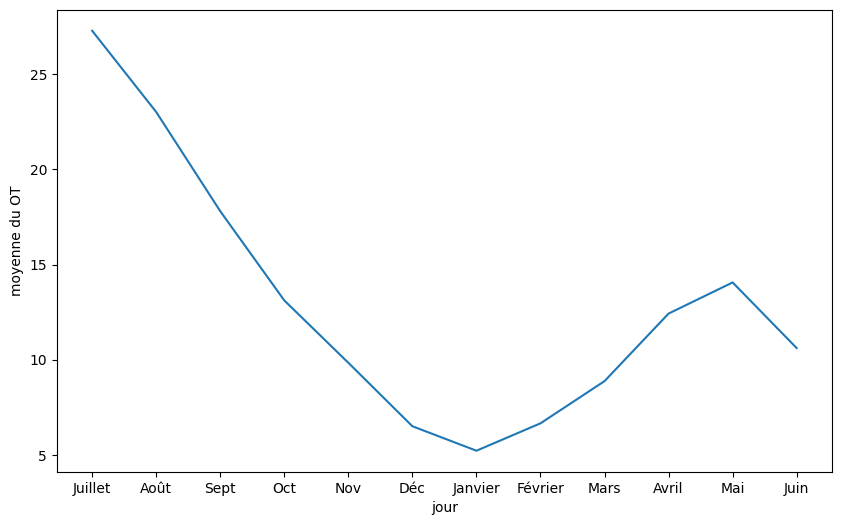

In [96]:
def meanByMonth(data):
    OTmean=[0 for i in range(int((len(data)-16)/(24*31))+1)]
    numberOfDay=0
    month=0
    for i,k in data.items():
        OTmean[numberOfDay]=OTmean[numberOfDay]+k["OT"]
        month=month+1
        if(month==24*31):
            month=0
            OTmean[numberOfDay]=OTmean[numberOfDay]/(24*31)
            numberOfDay=numberOfDay+1
    OTmean[len(OTmean)-1]=OTmean[len(OTmean)-1]/((24*31)+16)
    OTmonth=[0 for i in range(12)]
    for i in range(0,12):
        OTmonth[i]=(OTmean[i]+OTmean[i+12])/2
    return OTmonth

print(meanByMonth(data))
def graph3(data):
    plt.figure(figsize=(10, 6))  
    print(len(meanByMonth(data)))
    AllMonth=[
    "Juillet",
    "Août",
    "Sept",
    "Oct",
    "Nov",
    "Déc",
    "Janvier",
    "Février",
    "Mars",
    "Avril",
    "Mai",
    "Juin"
]
    plt.plot(AllMonth,meanByMonth(data))
    plt.xlabel('jour')
    plt.ylabel('moyenne du OT')
    plt.show()

graph3(data)